In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from PIL import Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
import cPickle as pickle

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline
%autosave 300
np.set_printoptions(threshold=np.inf)

Autosaving every 300 seconds


In [3]:
train_pickle_file = './SVHN_basic_train_labels.pickle'

with open(train_pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_labels = save['train_image_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_labels.shape)
print(train_labels[0:2,:])

Training set (33402L, 6L)
[[ 2.  0.  0.  0.  1.  9.]
 [ 2.  0.  0.  0.  2.  3.]]


In [4]:
train_pickle_file = 'SVHN_basic_train_data_basic.pickle'

with open(train_pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  del save  # hint to help gc free up memory
  print('Training set',train_dataset.shape)
print(train_labels[0:2,:])

Training set (33402L, 32L, 32L)
[[ 2.  0.  0.  0.  1.  9.]
 [ 2.  0.  0.  0.  2.  3.]]


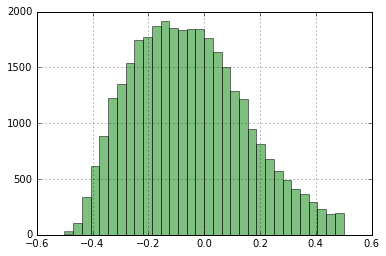

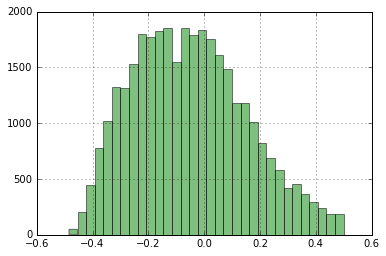

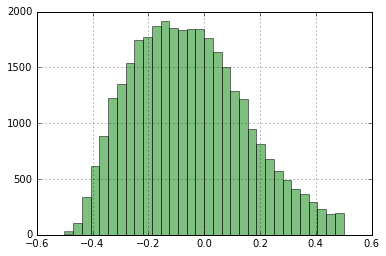

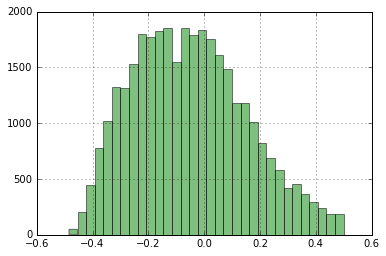

In [8]:
fig = plt.figure(1)
ax = fig.add_subplot(331)
numBins = 32
ax.hist(train_dataset[:,0,0],numBins,color='green',alpha=0.5)
plt.grid(True)

fig = plt.figure(2)
ax = fig.add_subplot(332)
ax.hist(train_dataset[:,0,1],numBins,color='green',alpha=0.5)
plt.grid(True)

fig = plt.figure(3)
ax = fig.add_subplot(333)
numBins = 32
ax.hist(train_dataset[:,0,0],numBins,color='green',alpha=0.5)
plt.grid(True)


fig = plt.figure(4)
ax = fig.add_subplot(231)
ax.hist(train_dataset[:,0,1],numBins,color='green',alpha=0.5)
plt.grid(True)


plt.show()

In [6]:
a=train_dataset
sm=np.sum(np.sum(a,axis=1),axis=1)

(array([   57.,   326.,   955.,  2054.,  3184.,  3777.,  3693.,  3504.,
         3217.,  2912.,  2550.,  2110.,  1627.,  1175.,   839.,   546.,
          407.,   282.,   147.,    40.]),
 array([-429.49411765, -384.2454902 , -338.99686275, -293.74823529,
        -248.49960784, -203.25098039, -158.00235294, -112.75372549,
         -67.50509804,  -22.25647059,   22.99215686,   68.24078431,
         113.48941176,  158.73803922,  203.98666667,  249.23529412,
         294.48392157,  339.73254902,  384.98117647,  430.22980392,
         475.47843137]),
 <a list of 20 Patch objects>)

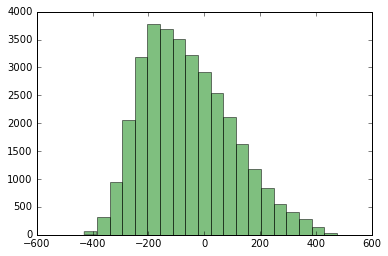

In [7]:
a=train_dataset
sm=np.sum(np.sum(a,axis=1),axis=1)

fig = plt.figure(1)
ax = fig.add_subplot(111)
numBins = 20
ax.hist(sm,numBins,color='green',alpha=0.5)